In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import collections
%matplotlib inline

In [11]:
# load data
df = pd.read_csv('C:/Users/betzy/Downloads/YT-USvideos.csv')

In [12]:
# preview data
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [13]:
# number of rows and columns
df.shape

(40949, 16)

In [14]:
# find out how many values are null in each column
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [15]:
# change category_id from numbers to category name
USvideo_category_json = None

with open('C:/Users/betzy/Downloads/US_category_id.json') as f:
    USvideo_category_json = json.load(f)
    
# make a dict to put in the value of the categories and category id
USvideo_categories = {}

for item in USvideo_category_json["items"]:
    USvideo_categories[int(item["id"])] = item["snippet"]["title"]

In [16]:
# show categories
USvideo_categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [17]:
# add categories to videos
for i, row in df.iterrows():
    df.at[i, 'category'] = USvideo_categories[df.at[i, 'category_id']]

In [18]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [19]:
# remove columns that will not be worked on
df.drop(columns=['thumbnail_link'])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,False,False,NaN,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


In [20]:
df.shape

(40949, 17)

In [21]:
# EDA STARTS HERE ------------------------------

In [22]:
# top 10 categories with the most trending videos
top10_categories = df['category'].value_counts()[:10]
print(top10_categories)

Entertainment           9964
Music                   6472
Howto & Style           4146
Comedy                  3457
People & Blogs          3210
News & Politics         2487
Science & Technology    2401
Film & Animation        2345
Sports                  2174
Education               1656
Name: category, dtype: int64


Text(0.5, 1.0, 'Top 10 Categories Distribution')

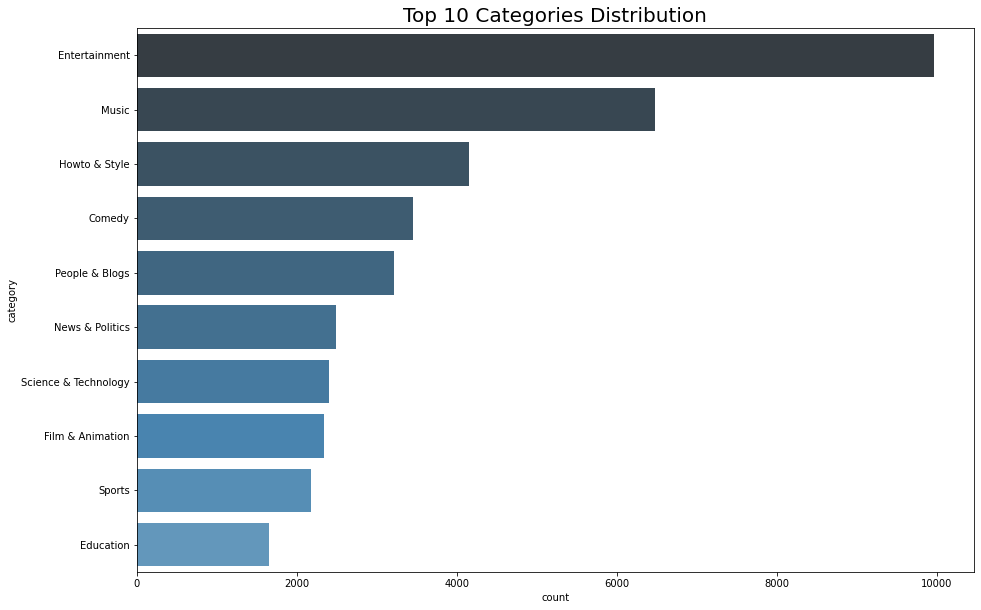

In [23]:
# visualize top 10 categories
mask = df['category'].map(lambda x: x in top10_categories.index.tolist())

# use seaborn to create a graph
sns.countplot(y='category', data=df[mask], palette=sns.color_palette('Blues_d',15),order=top10_categories.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Categories Distribution', size=20)

In [24]:
# top channels with the most trending videos in this dataset
top10_channels = df['channel_title'].value_counts()[:10]
print(top10_channels)

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Netflix                                   193
Vox                                       193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64


In [25]:
# categories of the top 10 channels

# get top channels by counting values of times channel has trended with a video
top10_channs = df['channel_title'].value_counts().index.values[:10]

# list to store the categories
top10_chan_cat = []

# go through the top channels and get thier category
for channel in top10_channs:
    top10_chan_cat.append(df.loc[df['channel_title'] == channel, 'category'].iloc[15])
print(top10_chan_cat)

['Sports', 'Comedy', 'Entertainment', 'Entertainment', 'News & Politics', 'Entertainment', 'Comedy', 'Comedy', 'Film & Animation', 'Sports']


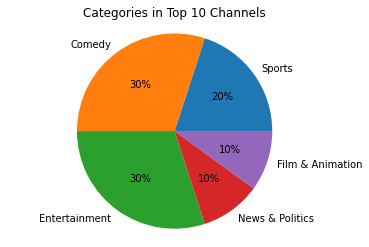

In [26]:
# what are the categories of the top 10 channels

# getting category frequency using Counter class from collections
top10_chan_cat_freq = collections.Counter(top10_chan_cat)

# make a pie chart to compare categories that make up the top 10 channels
pieLabels = list(top10_chan_cat_freq.keys())
pieValues = list(top10_chan_cat_freq.values())

figureObject, axesObject = plt.subplots()

# draw pie chart
axesObject.pie(pieValues, labels=pieLabels, autopct='%1.0f%%')
axesObject.axis('equal')
axesObject.set_title('Categories in Top 10 Channels')
plt.show()


In [27]:
# check if videos that have comments disabled also have ratings disabled
pd.crosstab(df.comments_disabled, df.ratings_disabled)

ratings_disabled,False,True
comments_disabled,,
False,40253,63
True,527,106


In [50]:
# which categories have the most comments disabled
pd.crosstab(df.category, df.comments_disabled)

comments_disabled,False,True
category,,
Autos & Vehicles,379,5
Comedy,3455,2
Education,1648,8
Entertainment,9768,196
Film & Animation,2317,28
Gaming,809,8
Howto & Style,4135,11
Music,6463,9
News & Politics,2313,174


In [52]:
# some videos were able to trend with out a description
no_desc = df[df['description'].isnull()]

# how many trended with out a description
no_desc.shape

(570, 17)

In [54]:
# what are the categories of those videos
no_desc = df[df['description'].isnull()]

no_desc_cat = no_desc['category'].value_counts()
print(no_desc_cat)

People & Blogs           149
Entertainment            145
News & Politics           78
Sports                    49
Science & Technology      40
Music                     35
Comedy                    22
Education                 14
Gaming                    14
Howto & Style              6
Film & Animation           5
Autos & Vehicles           5
Pets & Animals             4
Nonprofits & Activism      4
Name: category, dtype: int64


In [55]:
# since the top categories of videos with out description is similar to top 10 categories overall,
# see what top category with no description is not in top 10 categories overall
t10_cat = top10_categories.index.values[:10]
t10_no_desc_cat = no_desc_cat.index.values[:10]

overlap_no_desc = [item for item in t10_no_desc_cat if item not in t10_cat]
print(overlap_no_desc)

['Gaming']
